In [1]:
import pandas as pd
import re
import datetime


# =========== Pre-process ==========
df = pd.read_csv('201612-citibike-tripdata.csv')

# Missing values in columns
print(df.isnull().sum())


# Snake_case the columns
def camel_to_snake(name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).replace(' ','').lower()
df.columns = [camel_to_snake(col) for col in df.columns]

# Parse start_time and stop_time
try:
    df['start_datetime'] = [datetime.datetime.strptime(x, '%m/%d/%Y %H:%M:%S') for x in df.start_time]
except ValueError:
    df['start_datetime'] = [datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in df.start_time]
df['start_day'] = [x.strftime('%Y-%m-%d') for x in df.start_datetime]

# =========== Group by date and station ===========
df['bikein'] = 1
df['bikeout'] = 1

df_bikeout = df.groupby(by=['start_stationid', 'start_day'])['bikeout'].count()
df_bikeout = pd.DataFrame(df_bikeout)
df_out = df_bikeout.reset_index(drop = False)
df_out.rename_axis({'start_stationid':'station_id'}, axis='columns', inplace=True)
print(df_out.head())

df_bikein = df.groupby(by=['end_stationid', 'start_day'])['bikein'].count()
df_bikein = pd.DataFrame(df_bikein)
df_in = df_bikein.reset_index(drop = False)
df_in.rename_axis({'end_stationid':'station_id'}, axis='columns', inplace=True)
print(df_in.head())


# =========== Bike loss per day for each station ===========
# Merge two DFs by station_id
df_dayloss = df_out.merge(right=df_in, left_on=['station_id', 'start_day'], right_on=['station_id', 'start_day'],
                          how='outer')
df_dayloss = df_dayloss.sort_values(['station_id', 'start_day'])
df_dayloss = df_dayloss.fillna(0)
df_dayloss['bike_loss'] = df_dayloss['bikeout'] - df_dayloss['bikein']
print(df_dayloss)

Trip Duration                  0
Start Time                     0
Stop Time                      0
Start Station ID               0
Start Station Name             0
Start Station Latitude         0
Start Station Longitude        0
End Station ID                 0
End Station Name               0
End Station Latitude           0
End Station Longitude          0
Bike ID                        0
User Type                   5388
Birth Year                 39704
Gender                         0
dtype: int64
   station_id   start_day  bikeout
0          72  2016-12-01      100
1          72  2016-12-02       92
2          72  2016-12-03       53
3          72  2016-12-04       47
4          72  2016-12-05       78
   station_id   start_day  bikein
0          72  2016-12-01      90
1          72  2016-12-02      85
2          72  2016-12-03      50
3          72  2016-12-04      60
4          72  2016-12-05      62
       station_id   start_day  bikeout  bikein  bike_loss
0              72  2

In [2]:
# create weekday column
#wekday_name=pd.to_datetime(df_dayloss.start_day).dt.weekday_name   #name
df_wekday_index=pd.to_datetime(df_dayloss.start_day).dt.weekday   # index Monday=0, Sunday=6

In [3]:
# Append weekday column to df_dayloss
df_dayloss['wek_index']=df_wekday_index

In [4]:
df_dayloss

,station_id,start_day,bikeout,bikein,bike_loss,wek_index
0,72,2016-12-01,100.0,90.0,10.0,3
1,72,2016-12-02,92.0,85.0,7.0,4
2,72,2016-12-03,53.0,50.0,3.0,5
3,72,2016-12-04,47.0,60.0,-13.0,6
4,72,2016-12-05,78.0,62.0,16.0,0
5,72,2016-12-06,72.0,72.0,0.0,1
6,72,2016-12-07,80.0,84.0,-4.0,2
7,72,2016-12-08,74.0,84.0,-10.0,3
8,72,2016-12-09,68.0,58.0,10.0,4
9,72,2016-12-10,38.0,34.0,4.0,5


In [5]:
# =========== count docks ============
from six.moves import urllib

import json
import collections
import itertools
jsonurl = urllib.request.urlopen('https://gbfs.citibikenyc.com/gbfs/en/station_status.json')
text = json.loads(jsonurl.read()) # <-- read from it
data=text['data']
#print(len(data['stations']))   664 stations
#print(data['stations'][0]['station_id']) # station id

# station id Extract:
total_stations_id = []
for i in range(len(data['stations'])):
    id=data['stations'][i]['station_id']
    total_stations_id.append(id)
total_stations_id=[int(x) for x in total_stations_id]
#print('station_id list:'+str(total_stations_id))

# num_bikes_available Extract:
total_num_bikes_available = []
for i in range(len(data['stations'])):
    num_bikes_available = data['stations'][i]['num_bikes_available']
    total_num_bikes_available.append(num_bikes_available)
#print('bikes availble:'+str(total_num_bikes_available))

# num_docks_available Extract:
total_docks_available = []
for i in range(len(data['stations'])):
    docks_availble=data['stations'][i]['num_docks_available']
    total_docks_available.append(docks_availble)
#print('docks availble:'+str(total_docks_available))

total_docks=[x + y for x, y in zip(total_num_bikes_available, total_docks_available)]
#print('total docks for each station:'+str(total_docks))
#to_dict

new_dict = dict(zip(total_stations_id,total_docks))
print('zip station_id and total docks:'+str(new_dict))


zip station_id and total docks:{72: 36, 79: 32, 82: 0, 83: 59, 116: 39, 119: 19, 120: 19, 127: 30, 128: 30, 137: 0, 143: 21, 144: 19, 146: 37, 147: 0, 150: 31, 151: 32, 152: 29, 153: 54, 157: 22, 161: 35, 164: 47, 167: 44, 168: 47, 173: 50, 174: 30, 195: 44, 212: 28, 216: 23, 217: 37, 223: 32, 224: 0, 225: 37, 228: 55, 229: 23, 232: 23, 236: 38, 237: 39, 238: 30, 239: 29, 241: 23, 242: 23, 243: 31, 244: 30, 245: 22, 247: 18, 248: 23, 249: 26, 251: 26, 252: 33, 253: 54, 254: 29, 257: 39, 258: 22, 259: 39, 260: 31, 261: 27, 262: 24, 264: 27, 265: 33, 266: 24, 267: 55, 268: 25, 270: 23, 274: 30, 275: 19, 276: 25, 278: 19, 279: 36, 280: 31, 281: 58, 282: 27, 284: 40, 285: 0, 289: 19, 291: 19, 293: 55, 295: 24, 296: 35, 297: 27, 301: 37, 302: 23, 303: 31, 304: 34, 305: 31, 306: 35, 307: 29, 308: 27, 309: 39, 310: 36, 311: 31, 312: 31, 313: 23, 314: 39, 315: 29, 316: 42, 317: 27, 319: 31, 320: 38, 321: 27, 322: 3, 323: 36, 324: 51, 325: 34, 326: 27, 327: 39, 328: 22, 330: 39, 331: 25, 332: 2

In [6]:
# append docks to df_dayloss
df_dayloss['docks'] = df_dayloss['station_id'].map(new_dict)

In [7]:
df_dayloss

,station_id,start_day,bikeout,bikein,bike_loss,wek_index,docks
0,72,2016-12-01,100.0,90.0,10.0,3,36.0
1,72,2016-12-02,92.0,85.0,7.0,4,36.0
2,72,2016-12-03,53.0,50.0,3.0,5,36.0
3,72,2016-12-04,47.0,60.0,-13.0,6,36.0
4,72,2016-12-05,78.0,62.0,16.0,0,36.0
5,72,2016-12-06,72.0,72.0,0.0,1,36.0
6,72,2016-12-07,80.0,84.0,-4.0,2,36.0
7,72,2016-12-08,74.0,84.0,-10.0,3,36.0
8,72,2016-12-09,68.0,58.0,10.0,4,36.0
9,72,2016-12-10,38.0,34.0,4.0,5,36.0


In [8]:
# Append holiday column to df_dayloss
holiday = ['2016-01-01', '2016-01-18', '2016-02-12', '2016-02-15',
          '2016-05-08', '2016-05-30', '2016-06-19', '2016-07-04',
          '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24',
          '2016-12-26']
df_dayloss['holiday_idx'] = df_dayloss['start_day'].apply(lambda x: 1 if (x in holiday) else 0)

In [9]:
df_dayloss

,station_id,start_day,bikeout,bikein,bike_loss,wek_index,docks,holiday_idx
0,72,2016-12-01,100.0,90.0,10.0,3,36.0,0
1,72,2016-12-02,92.0,85.0,7.0,4,36.0,0
2,72,2016-12-03,53.0,50.0,3.0,5,36.0,0
3,72,2016-12-04,47.0,60.0,-13.0,6,36.0,0
4,72,2016-12-05,78.0,62.0,16.0,0,36.0,0
5,72,2016-12-06,72.0,72.0,0.0,1,36.0,0
6,72,2016-12-07,80.0,84.0,-4.0,2,36.0,0
7,72,2016-12-08,74.0,84.0,-10.0,3,36.0,0
8,72,2016-12-09,68.0,58.0,10.0,4,36.0,0
9,72,2016-12-10,38.0,34.0,4.0,5,36.0,0


### training data split

In [11]:
dayloss_72 =df_dayloss[df_dayloss['station_id'] == 72]
dayloss_72

,station_id,start_day,bikeout,bikein,bike_loss,wek_index,docks,holiday_idx
0,72,2016-12-01,100.0,90.0,10.0,3,36.0,0
1,72,2016-12-02,92.0,85.0,7.0,4,36.0,0
2,72,2016-12-03,53.0,50.0,3.0,5,36.0,0
3,72,2016-12-04,47.0,60.0,-13.0,6,36.0,0
4,72,2016-12-05,78.0,62.0,16.0,0,36.0,0
5,72,2016-12-06,72.0,72.0,0.0,1,36.0,0
6,72,2016-12-07,80.0,84.0,-4.0,2,36.0,0
7,72,2016-12-08,74.0,84.0,-10.0,3,36.0,0
8,72,2016-12-09,68.0,58.0,10.0,4,36.0,0
9,72,2016-12-10,38.0,34.0,4.0,5,36.0,0


In [26]:
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# training data split
X = dayloss_72[['wek_index','holiday_idx','docks']]
y = dayloss_72['bike_loss']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)
#y_train, y_test = cross_validation(y, test_size = 0.25, random_state = 123)
X_train = X_train.sort_index()
X_test = X_test.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()
X_train

,wek_index,holiday_idx,docks
0,3,0,36.0
1,4,0,36.0
2,5,0,36.0
3,6,0,36.0
4,0,0,36.0
6,2,0,36.0
9,5,0,36.0
10,6,0,36.0
11,0,0,36.0
13,2,0,36.0


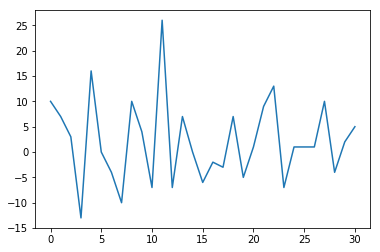

In [29]:
plt.plot(dayloss_72.index, dayloss_72.bike_loss)

### Lasso

In [37]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
import numpy as np

In [38]:
import math
def RMSPE(y, y_pred):
    return math.sqrt( ((1- y_pred / y)**2).mean() )

In [74]:
def test_lasso(alphas):
    scores_lasso = []
    kf = KFold(n_splits=10, random_state = 123)
    
    for alpha in alphas:
        lasso = Lasso(alpha)
        for train, val in kf.split(X_train):
            score_cv = []
            y_pred = lasso.fit(X_train.values[train],y_train.values[train]).predict(X_train.values[val])
            score_cv.append(RMSPE(y_train.values[val], y_pred))
            score = np.mean(score_cv)
        scores_lasso.append(score)
    
    plt.figure(figsize=(14,8))
    cv_lasso = pd.Series(scores_lasso, index = alphas)
    cv_lasso.plot(title = "Validation - Lasso")
    plt.xlabel("alpha")
    plt.ylabel("RMSPE")
    print(cv_lasso.argmin())

/Users/xiaowan/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


20.0


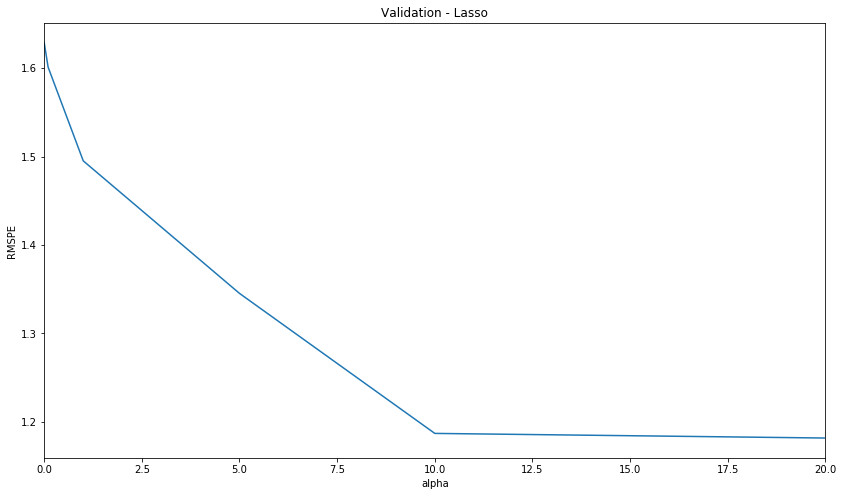

In [75]:
alphas = [1e-4, 1e-3,1e-2, 0.1, 1, 5, 10, 20]
test_lasso(alphas)

/Users/xiaowan/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


12


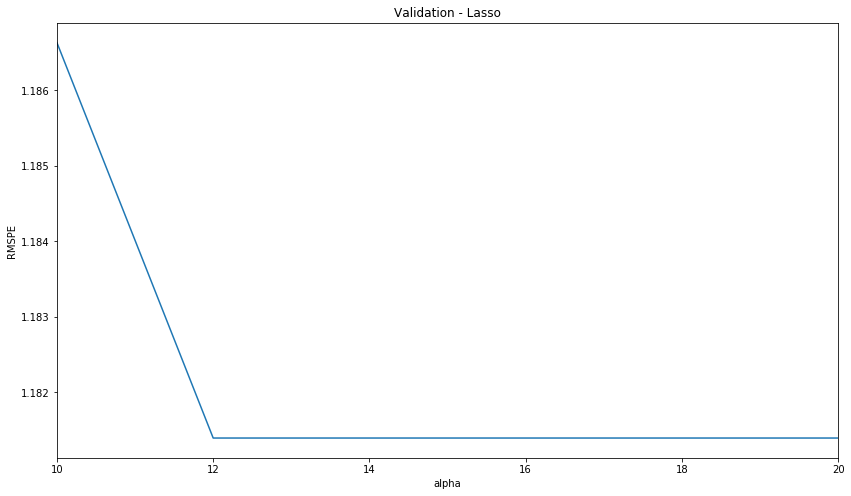

In [76]:
alphas = [10, 12, 14, 18, 20]
test_lasso(alphas)

/Users/xiaowan/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


10.5


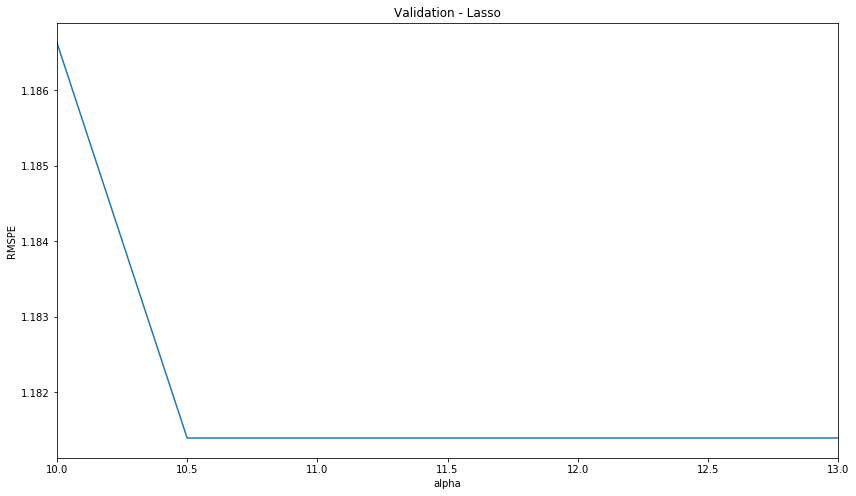

In [77]:
alphas = [10, 10.5, 11, 11.25, 11.5, 11.75, 12, 12.25, 12.5, 13]
test_lasso(alphas)

/Users/xiaowan/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


10.2


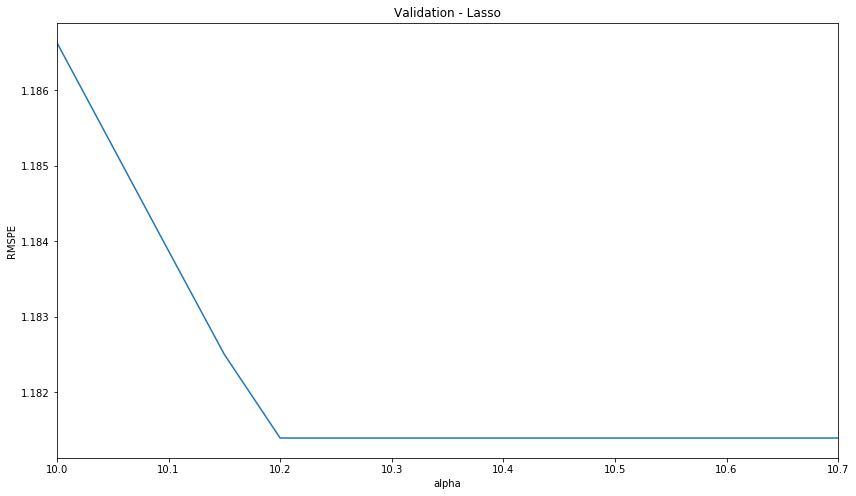

In [78]:
alphas = [10, 10.10,10.15, 10.20, 10.25, 10.30,10.40,10.55,10.7]
test_lasso(alphas)

In [79]:
lasso = Lasso(alpha=10.2)
scores_lasso = []
kf = KFold(n_splits=10, random_state = 123)
    
for alpha in alphas:
    lasso = Lasso(alpha)
    for train, val in kf.split(X_train):
        score_cv = []
        y_pred = lasso.fit(X_train.values[train],y_train.values[train]).predict(X_train.values[val])
        score_cv.append(RMSPE(y_train.values[val], y_pred))
        score = np.mean(score_cv)
    scores_lasso.append(score)

/Users/xiaowan/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


In [80]:
# prediction of bike loss of station 72
y_pred

array([ 2.33333333,  2.33333333])